# **Imports**

In [74]:
import numpy as np
import pandas as pd
import string
import time
import os 

from matplotlib import pyplot as plt

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from google.colab import drive
drive.mount('/content/drive')

In [23]:
!unzip -q /content/drive/MyDrive/books.zip -d /content/ 
!mv "/content/books/authors/Charlotee Bronte" "/content/books/authors/Charlotte Bronte"

# **Util Functions**

In [104]:
def tokenization(book_path, stop_word_removal = True):
    book = []
    with open(book_path, 'r') as file:

        stop_words_list = list(set(stopwords.words('english')))

        punctuation_marks = ['.', ',', '?', '!', ';', ':',"’", "'", '"', '(', ')', '[', ']', '-', '—', '/',"“", "”"]
        punctuation_dict = {ord(punctuation): None for punctuation in punctuation_marks}
        for line in file.readlines():
            line = line.strip().lstrip('\ufeff').lower()
            line = line.translate(punctuation_dict)
            line = line.translate(str.maketrans("’", " ", "‘’" + string.punctuation))
            line = line.split(" ")
            line = [x for x in line if x not in [""]]
            book.extend(line)
    
    if stop_word_removal:
        book_without_stop_words = [word for word in book if word not in stop_words_list]
        return book, book_without_stop_words
    else: 
        return book

def create_frequency_dict(book, diction = False):
    word_types, word_frequencies = np.unique(book, return_counts = True)
    word_types = list(word_types)
    word_frequencies = list(word_frequencies)
    # sort by rank
    word_types, word_frequencies = zip(*sorted(zip(word_types, word_frequencies), key=lambda x: x[1], reverse=True))

    if diction:
        word_freq_dict = dict(zip(word_types, word_frequencies))
        return word_freq_dict
    else:
        return word_types, word_frequencies

def book_compose(dct, stop_word = 0):
    list1, list2, list3 = [], [], []

    for author, books in dct.items():
        for book, values in books.items():
            if author == "Charlotte Bronte":
                list1.extend(values[stop_word])
            elif author == "Fyodor Dostoyevsky":
                list2.extend(values[stop_word])
            elif author == "Leo Tolstoy":
                list3.extend(values[stop_word])
    return list1, list2, list3

def count_word_types(corpus, size):
    num_unique_words = []
    num_iter = len(corpus) // size
    for batch in range(num_iter):
        num_unique_words.append(len(np.unique(corpus[:(batch+1)*size])))

    num_unique_words.append(len(np.unique(corpus)))
    return num_unique_words  

def zipf_plot(list_dicts, label_list, scale_type, title):
    plt.figure(figsize=(8, 8))

    books_freqs = []
    ranks_list = []

    for diction in list_dicts:
        freqs = list(diction.values())
        books_freqs.append(freqs)
        
        ranks = range(1, len(freqs)+1)
        ranks_list.append(ranks)
    
    if scale_type == "linear":
        for i, (ranks, freqs) in enumerate(zip(ranks_list, books_freqs)):
            plt.plot(ranks, freqs)

        plt.xlabel('Rank')
        plt.ylabel('Frequency')
        plt.title("Zipf's Law Curve in Linear Scale " + title)
        plt.legend(label_list)
        plt.show()
    
    if scale_type == "log-log":
        for i, (ranks, freqs) in enumerate(zip(ranks_list, books_freqs)):
            plt.loglog(ranks, freqs)

        plt.xlabel('Rank')
        plt.ylabel('Frequency')
        plt.title("Zipf's Law Curve in Log-Log Scale " + title)
        plt.legend(label_list)
        plt.show()

def random_generated_corpus(size_by_len=None, size_by_word=None, max_len = None, alphabet=None):
    if alphabet is None:
        alphabet = "abcdefghijklmnopqrstuvwxyz "
    symbols = list(alphabet)
    text = ""
    low = 0
    high = len(symbols)
    
    if size_by_len is not None:
        for i in range(size_by_len):
            text += symbols[np.random.randint(low, high, size=1).item()]

    elif size_by_word is not None:
        while text.count(" ") < size_by_word:
            if max_len is not None:
                if text.count(" ") > 0:
                    word_len = len(text) - text.rfind(" ") - 1
                    if word_len == max_len:
                        text += " "
            text += symbols[np.random.randint(low, high, size=1).item()]
        
    corpus = text.split(" ")
    return corpus

# **Preprocess of All Books**

In [49]:
path_authors = "books/authors/"
path_genres = "books/genres/"

authors = os.listdir(path_authors)
genres = os.listdir(path_genres)

author_tokenized = {}
genres_tokenized = {}

# dictionary of dictionaries, inner dictionary has two values first one is
# tokenized corpus second one is tokenized corpus with stop words removed
for author in authors:
    dict_books = {}
    author_books = os.listdir(path_authors + author + "/")
    for book in author_books:
        book_path = path_authors + author + "/" + book
        dict_books[book[:-4]] = tokenization(book_path, stop_word_removal=True)
    
    author_tokenized[author] = dict_books

for genre in genres:
    dict_books = {}
    genre_books = os.listdir(path_genres + genre + "/")
    for book in genre_books:
        book_path = path_genres + genre + "/" + book
        dict_books[book[:-4]] = tokenization(book_path, stop_word_removal=True)
    
    genres_tokenized[genre] = dict_books

composed_books_charlot, composed_books_dost, composed_books_tols = book_compose(author_tokenized, stop_word = 0)
composed_books_charlot_rmvd, composed_books_dost_rmvd, composed_books_tols_rmvd = book_compose(author_tokenized, stop_word = 1)
print("Length of Corpus After Preprocess:")
print(f"Composed Corpus Length of Leo Tolstoy: {len(composed_books_tols)}")
print(f"Composed Corpus Length of Charlotte Bronte: {len(composed_books_charlot)}")
print(f"Composed Corpus Length of Fyodor Dostoyevsky: {len(composed_books_dost)}")
print("\n")
print("Length of Corpus After Preprocess and Stop Words are Removed:")
print(f"Composed Corpus Length of Leo Tolstoy: {len(composed_books_tols_rmvd)}")
print(f"Composed Corpus Length of Charlotte Bronte: {len(composed_books_charlot_rmvd)}")
print(f"Composed Corpus Length of Fyodor Dostoyevsky: {len(composed_books_dost_rmvd)}")

Length of Corpus After Preprocess:
Composed Corpus Length of Leo Tolstoy: 1085118
Composed Corpus Length of Charlotte Bronte: 590811
Composed Corpus Length of Fyodor Dostoyevsky: 793637


Length of Corpus After Preprocess and Stop Words are Removed:
Composed Corpus Length of Leo Tolstoy: 517924
Composed Corpus Length of Charlotte Bronte: 286372
Composed Corpus Length of Fyodor Dostoyevsky: 367143


# **Part F.1**

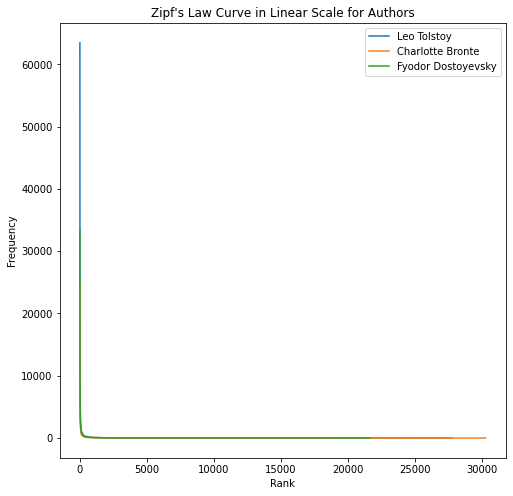

In [ ]:
tols_freq_dict = create_frequency_dict(composed_books_tols, diction = True)
charlot_freq_dict = create_frequency_dict(composed_books_charlot, diction = True)
dost_freq_dict = create_frequency_dict(composed_books_dost, diction = True)

author_dicts = [tols_freq_dict, charlot_freq_dict, dost_freq_dict]
label_authors = ["Leo Tolstoy", "Charlotte Bronte", "Fyodor Dostoyevsky"]

zipf_plot(list_dicts=author_dicts, label_list=label_authors, scale_type = "linear", title = "for Authors")

# **Part F.2**

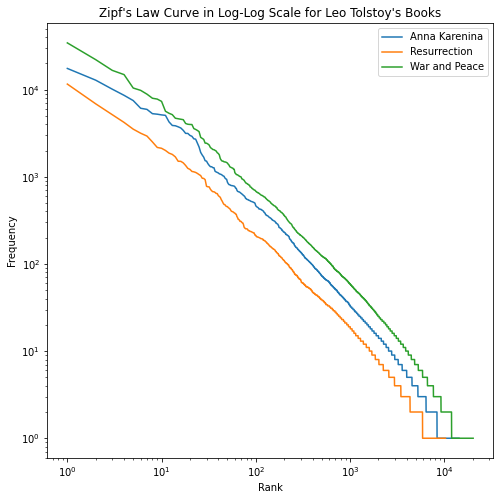

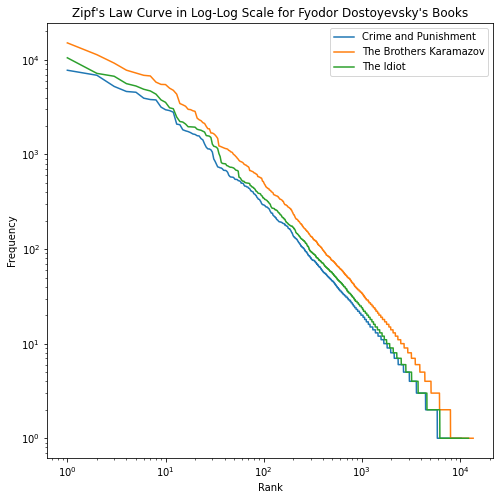

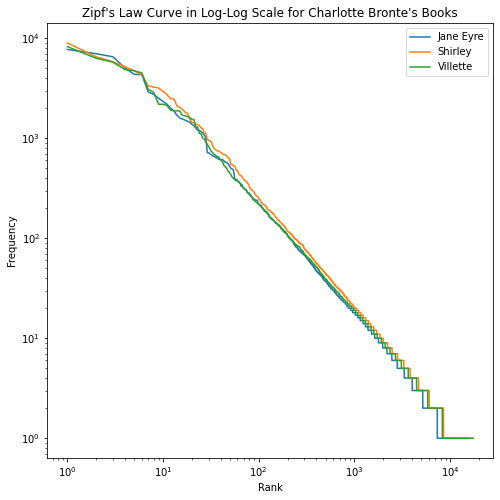

In [ ]:
anna_dict = create_frequency_dict(author_tokenized["Leo Tolstoy"]["anna_karenina"][0], diction = True)
resur_dict = create_frequency_dict(author_tokenized["Leo Tolstoy"]["resurrection"][0], diction = True)
war_dict = create_frequency_dict(author_tokenized["Leo Tolstoy"]["war_and_peace"][0], diction = True)

crime_dict = create_frequency_dict(author_tokenized["Fyodor Dostoyevsky"]["crime_and_punishment"][0], diction = True)
brother_dict = create_frequency_dict(author_tokenized["Fyodor Dostoyevsky"]["the_brothers_karamazov"][0], diction = True)
idiot_dict = create_frequency_dict(author_tokenized["Fyodor Dostoyevsky"]["the_idiot"][0], diction = True)

jane_dict = create_frequency_dict(author_tokenized["Charlotte Bronte"]["jane_eyre"][0], diction = True)
shir_dict = create_frequency_dict(author_tokenized["Charlotte Bronte"]["shirley"][0], diction = True)
vil_dict = create_frequency_dict(author_tokenized["Charlotte Bronte"]["villette"][0], diction = True)


leo_list = [anna_dict, resur_dict, war_dict]
leo_label_list = ["Anna Karenina", "Resurrection", "War and Peace"]

dost_list = [crime_dict, brother_dict, idiot_dict]
dost_label_list = ["Crime and Punishment", "The Brothers Karamazov", "The Idiot"]

char_list = [jane_dict, shir_dict, vil_dict]
char_label_list = ["Jane Eyre", "Shirley", "Villette"]

zipf_plot(list_dicts=leo_list, label_list=leo_label_list, scale_type = "log-log", title = "for Leo Tolstoy's Books")
zipf_plot(list_dicts=dost_list, label_list=dost_label_list, scale_type = "log-log", title = "for Fyodor Dostoyevsky's Books")
zipf_plot(list_dicts=char_list, label_list=char_label_list, scale_type = "log-log", title = "for Charlotte Bronte's Books")

# **Part G**

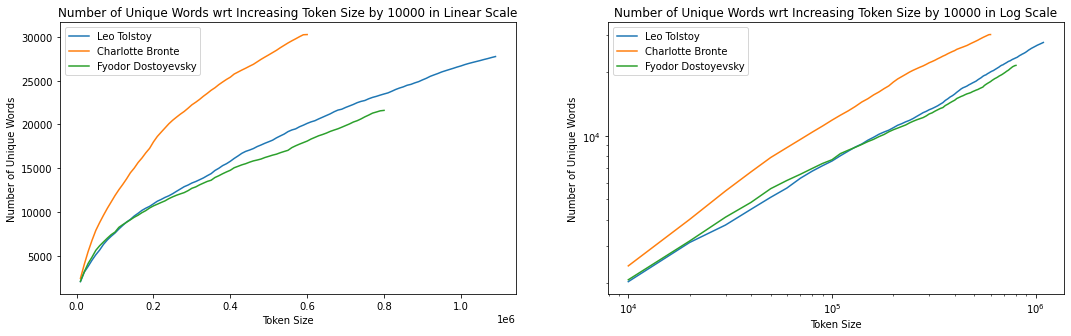

In [ ]:
# get composed books from part f1
size = 10000

num_unique_words_tols = count_word_types(composed_books_tols, size = size)
num_unique_words_dost = count_word_types(composed_books_dost, size = size)
num_unique_words_charlot = count_word_types(composed_books_charlot, size = size)

range_tols = np.arange(size, (len(num_unique_words_tols)+1)*size, size)
range_dost = np.arange(size, (len(num_unique_words_dost)+1)*size, size)
range_charlot = np.arange(size, (len(num_unique_words_charlot)+1)*size, size)

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.plot(range_tols, num_unique_words_tols)
plt.plot(range_dost, num_unique_words_dost)
plt.plot(range_charlot, num_unique_words_charlot)
plt.xlabel("Token Size")
plt.ylabel("Number of Unique Words")
plt.legend(["Leo Tolstoy", "Charlotte Bronte", "Fyodor Dostoyevsky"])
plt.title(f"Number of Unique Words wrt Increasing Token Size by {size} in Linear Scale")

plt.subplot(1,2,2)
plt.loglog(range_tols, num_unique_words_tols)
plt.loglog(range_dost, num_unique_words_dost)
plt.loglog(range_charlot, num_unique_words_charlot)
plt.xlabel("Token Size")
plt.ylabel("Number of Unique Words")
plt.legend(["Leo Tolstoy", "Charlotte Bronte", "Fyodor Dostoyevsky"])
plt.title(f"Number of Unique Words wrt Increasing Token Size by {size} in Log Scale")
plt.show()

# **Part H**

Text(0.5, 1.0, 'Number of Unique Words wrt Increasing Token Size \nby 5000 in Log Scale for Each 9 Books')

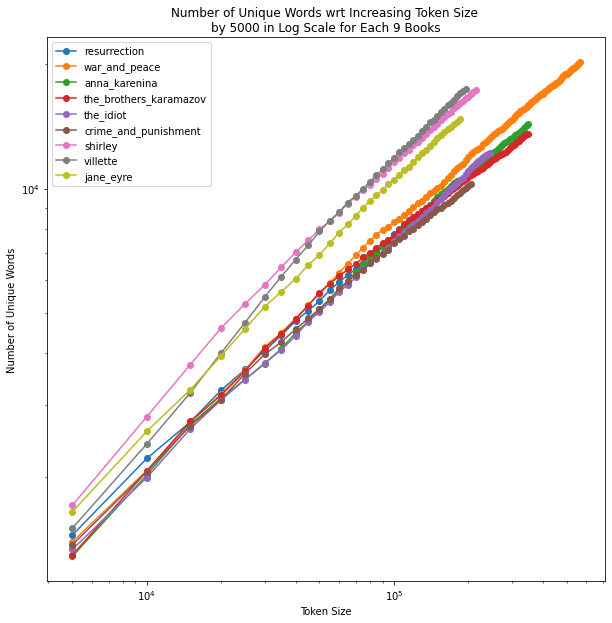

In [26]:
size = 5000

authors = []
books_author = []
word_freqs_author = []
x_ranges_author = []

plt.figure(figsize=(10,10))
for author in author_tokenized.keys():
    authors.append(author)
    for book in author_tokenized[author].keys():
        y = count_word_types(author_tokenized[author][book][0], size = size)
        x = range_tols = np.arange(size, (len(y)+1)*size, size)

        books_author.append(book)
        word_freqs_author.append(y)
        x_ranges_author.append(x)

        plt.loglog(x, y, label = book, marker = "o")

plt.xlabel("Token Size")
plt.ylabel("Number of Unique Words")
plt.legend()
plt.title(f"Number of Unique Words wrt Increasing Token Size \nby {size} in Log Scale for Each 9 Books")

# **Part I**

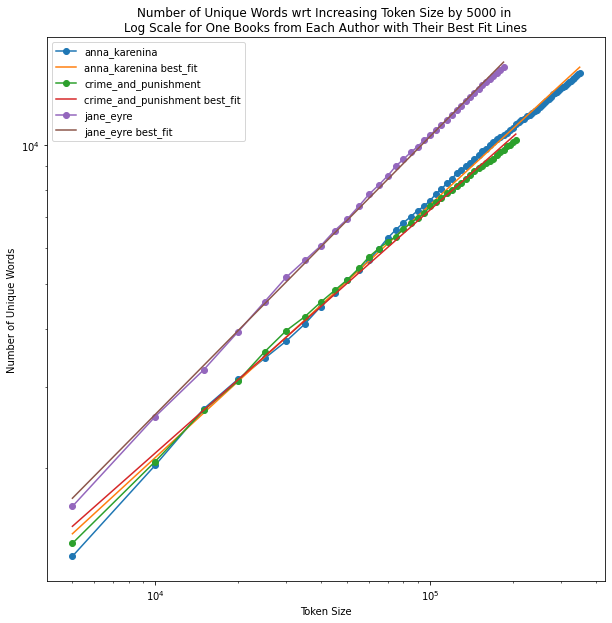

,Authors,Book Names,Interception,Slope
0,Leo Tolstoy,resurrection,1.183568,0.540576
1,Leo Tolstoy,war_and_peace,1.167179,0.547414
2,Leo Tolstoy,anna_karenina,1.134301,0.547377
3,Fyodor Dostoyevsky,the_brothers_karamazov,1.313780,0.511828
4,Fyodor Dostoyevsky,the_idiot,1.053626,0.563567
5,Fyodor Dostoyevsky,crime_and_punishment,1.227881,0.526434
6,Charlotte Bronte,shirley,1.127332,0.586299
7,Charlotte Bronte,villette,0.779380,0.657954
8,Charlotte Bronte,jane_eyre,1.009208,0.601987


In [47]:
coefficients_author = []

for x_range, freqs in zip(x_ranges_author, word_freqs_author):
    x_log = np.log10(x_range)
    y_log = np.log10(freqs)
    coeffs = np.polyfit(x_log, y_log, 1)
    coefficients_author.append(coeffs)

plt.figure(figsize=(10,10))
for i in range(2,9,3):
    label1 = books_author[i]
    label2 = books_author[i] + " best_fit"
    plt.loglog(x_ranges_author[i], word_freqs_author[i], label = label1, marker = "o")
    plt.loglog(x_ranges_author[i], 10**coefficients_author[i][1] * x_ranges_author[i]**coefficients_author[i][0], label = label2)

coefficients_author = np.concatenate(coefficients_author).reshape(-1, 2)

coeff_table = pd.DataFrame(columns=["Authors" ,"Book Names", "Interception", "Slope"])
coeff_table["Authors"] = np.repeat(list(author_tokenized.keys()), 3)
coeff_table["Book Names"] = books_author
coeff_table["Interception"] = coefficients_author[:,1]
coeff_table["Slope"] = coefficients_author[:,0]


plt.xlabel("Token Size")
plt.ylabel("Number of Unique Words")
plt.legend()
plt.title(f"Number of Unique Words wrt Increasing Token Size by {size} in \nLog Scale for One Books from Each Author with Their Best Fit Lines")
plt.show()
print("\n")
coeff_table

# **Part J**

Text(0.5, 1.0, 'Number of Unique Words wrt Increasing Token Size \nby 5000 in Log Scale for Each 9 Books')

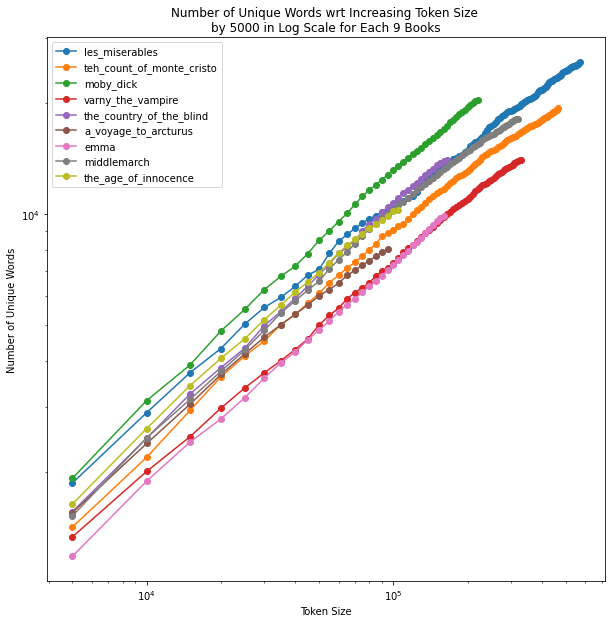

In [32]:
size = 5000

genres = []
books_genres = []
word_freqs_genres = []
x_ranges_genres = []

plt.figure(figsize=(10,10))
for genre in genres_tokenized.keys():
    genres.append(genre)
    for book in genres_tokenized[genre].keys():
        y = count_word_types(genres_tokenized[genre][book][0], size = size)
        x = np.arange(size, (len(y)+1)*size, size)

        books_genres.append(book)
        word_freqs_genres.append(y)
        x_ranges_genres.append(x)

        plt.loglog(x, y, label = book, marker = "o")

plt.xlabel("Token Size")
plt.ylabel("Number of Unique Words")
plt.legend()
plt.title(f"Number of Unique Words wrt Increasing Token Size \nby {size} in Log Scale for Each 9 Books")

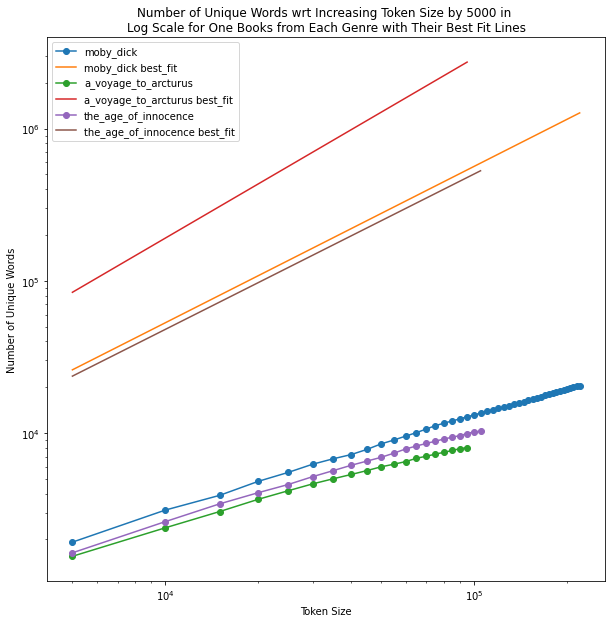

,Genres,Book Names,Interception,Slope
0,Classic Literature,les_miserables,1.345879,0.534559
1,Classic Literature,teh_count_of_monte_cristo,1.207247,0.547175
2,Classic Literature,moby_dick,1.027039,0.616711
3,Science Fiction,varny_the_vampire,1.037386,0.566320
4,Science Fiction,the_country_of_the_blind,0.865082,0.632138
5,Science Fiction,a_voyage_to_arcturus,1.182589,0.550670
6,Romance,emma,0.854323,0.602570
7,Romance,middlemarch,1.088318,0.580875
8,Romance,the_age_of_innocence,1.020389,0.599806


In [46]:
coefficients_genres = []

for x_range, freqs in zip(x_ranges_genres, word_freqs_genres):
    x_log = np.log10(x_range)
    y_log = np.log10(freqs)
    coeffs = np.polyfit(x_log, y_log, 1)
    coefficients_genres.append(coeffs)

plt.figure(figsize=(10,10))
for i in range(2,9,3):
    label1 = books_genres[i]
    label2 = books_genres[i] + " best_fit"
    plt.loglog(x_ranges_genres[i], word_freqs_genres[i], label = label1, marker = "o")
    plt.loglog(x_ranges_genres[i], 10**coefficients_genres[i][0] * x_ranges_genres[i]**coefficients_genres[i][1], label = label2)

coefficients_genres = np.concatenate(coefficients_genres).reshape(-1, 2)

coeff_table = pd.DataFrame(columns=["Genres", "Book Names", "Interception", "Slope"])
coeff_table["Genres"] = np.repeat(list(genres_tokenized.keys()), 3)
coeff_table["Book Names"] = books_genres
coeff_table["Interception"] = coefficients_genres[:,1]
coeff_table["Slope"] = coefficients_genres[:,0]


plt.xlabel("Token Size")
plt.ylabel("Number of Unique Words")
plt.legend()
plt.title(f"Number of Unique Words wrt Increasing Token Size by {size} in \nLog Scale for One Books from Each Genre with Their Best Fit Lines")
plt.show()
print("\n")
coeff_table

# **Part L**

**Part G when Stop Words are Removed**

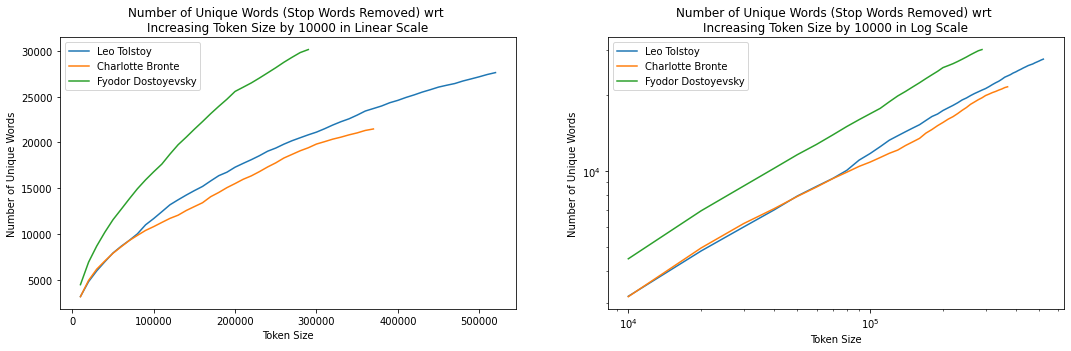

In [ ]:
# get composed books from part f1
size = 10000

num_unique_words_tols_rmvd = count_word_types(composed_books_tols_rmvd, size = size)
num_unique_words_dost_rmvd = count_word_types(composed_books_dost_rmvd, size = size)
num_unique_words_charlot_rmvd = count_word_types(composed_books_charlot_rmvd, size = size)

range_tols = np.arange(size, (len(num_unique_words_tols_rmvd)+1)*size, size)
range_dost = np.arange(size, (len(num_unique_words_dost_rmvd)+1)*size, size)
range_charlot = np.arange(size, (len(num_unique_words_charlot_rmvd)+1)*size, size)

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.plot(range_tols, num_unique_words_tols_rmvd)
plt.plot(range_dost, num_unique_words_dost_rmvd)
plt.plot(range_charlot, num_unique_words_charlot_rmvd)
plt.xlabel("Token Size")
plt.ylabel("Number of Unique Words")
plt.legend(["Leo Tolstoy", "Charlotte Bronte", "Fyodor Dostoyevsky"])
plt.title(f"Number of Unique Words (Stop Words Removed) wrt \nIncreasing Token Size by {size} in Linear Scale")

plt.subplot(1,2,2)
plt.loglog(range_tols, num_unique_words_tols_rmvd)
plt.loglog(range_dost, num_unique_words_dost_rmvd)
plt.loglog(range_charlot, num_unique_words_charlot_rmvd)
plt.xlabel("Token Size")
plt.ylabel("Number of Unique Words")
plt.legend(["Leo Tolstoy", "Charlotte Bronte", "Fyodor Dostoyevsky"])
plt.title(f"Number of Unique Words (Stop Words Removed) wrt \nIncreasing Token Size by {size} in Log Scale")
plt.show()

**Part *H and I* when Stop Words are Removed**

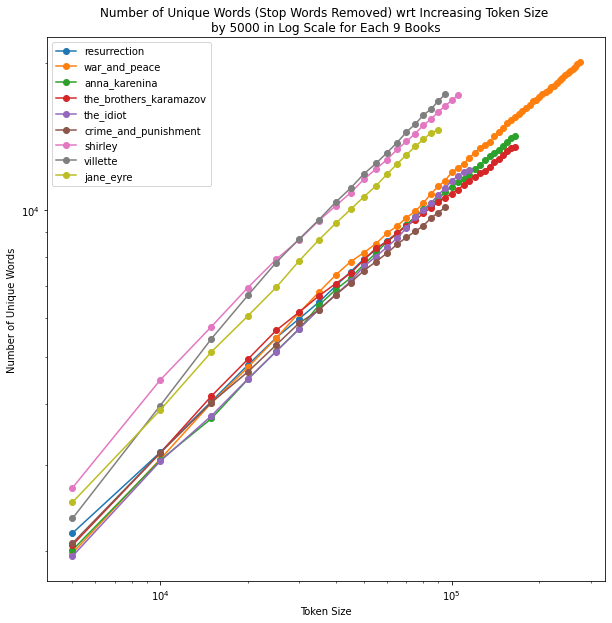

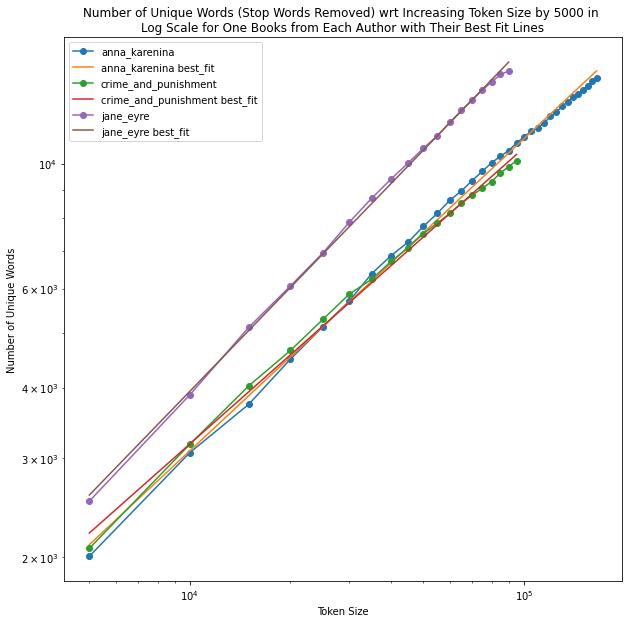

,Book Names,Interception,Slope
0,resurrection,0.547967,1.318577
1,war_and_peace,0.557693,1.279313
2,anna_karenina,0.554423,1.272433
3,the_brothers_karamazov,0.510491,1.483059
4,the_idiot,0.579967,1.156354
5,crime_and_punishment,0.526048,1.398066
6,shirley,0.587760,1.296045
7,villette,0.660957,0.962392
8,jane_eyre,0.612850,1.144471


In [ ]:
size = 5000

authors = []
books_author = []
word_freqs_author = []
x_ranges_author = []

plt.figure(figsize=(10,10))
for author in author_tokenized.keys():
    authors.append(author)
    for book in author_tokenized[author].keys():
        y = count_word_types(author_tokenized[author][book][1], size = size)
        x = range_tols = np.arange(size, (len(y)+1)*size, size)

        books_author.append(book)
        word_freqs_author.append(y)
        x_ranges_author.append(x)

        plt.loglog(x, y, label = book, marker = "o")

plt.xlabel("Token Size")
plt.ylabel("Number of Unique Words")
plt.legend()
plt.title(f"Number of Unique Words (Stop Words Removed) wrt Increasing Token Size \nby {size} in Log Scale for Each 9 Books")
plt.show()

coefficients_author = []

for x_range, freqs in zip(x_ranges_author, word_freqs_author):
    x_log = np.log10(x_range)
    y_log = np.log10(freqs)
    coeffs = np.polyfit(x_log, y_log, 1)
    coefficients_author.append(coeffs)

plt.figure(figsize=(10,10))
for i in range(2,9,3):
    label1 = books_author[i]
    label2 = books_author[i] + " best_fit"
    plt.loglog(x_ranges_author[i], word_freqs_author[i], label = label1, marker = "o")
    plt.loglog(x_ranges_author[i], 10**coefficients_author[i][1] * x_ranges_author[i]**coefficients_author[i][0], label = label2)

coefficients_author = np.concatenate(coefficients_author).reshape(-1, 2)

coeff_table = pd.DataFrame(columns=["Authors" ,"Book Names", "Interception", "Slope"])
coeff_table["Authors"] = np.repeat(list(author_tokenized.keys()), 3)
coeff_table["Book Names"] = books_author
coeff_table["Interception"] = coefficients_author[:,0]
coeff_table["Slope"] = coefficients_author[:,1]


plt.xlabel("Token Size")
plt.ylabel("Number of Unique Words")
plt.legend()
plt.title(f"Number of Unique Words (Stop Words Removed) wrt Increasing Token Size by {size} in \nLog Scale for One Books from Each Author with Their Best Fit Lines")
plt.show()
print("\n")
coeff_table

**Part *J* when Stop Words are Removed**

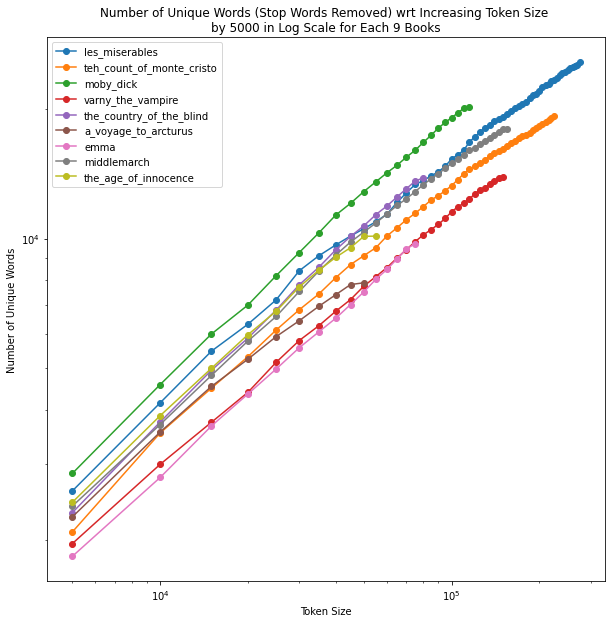

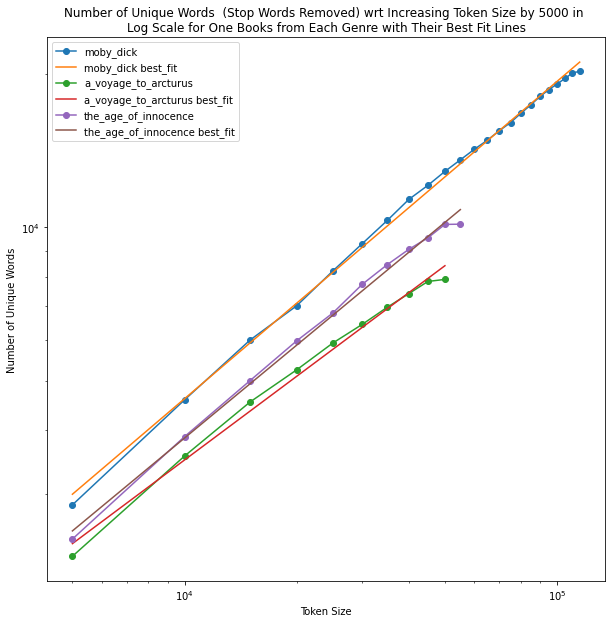

,Book Names,Interception,Slope
0,les_miserables,0.546757,1.449061
1,teh_count_of_monte_cristo,0.553704,1.344310
2,moby_dick,0.623020,1.171210
3,varny_the_vampire,0.580500,1.155527
4,the_country_of_the_blind,0.647939,0.982073
5,a_voyage_to_arcturus,0.545645,1.360431
6,emma,0.616755,0.982458
7,middlemarch,0.584299,1.250626
8,the_age_of_innocence,0.605734,1.163153


In [ ]:
size = 5000

genres = []
books_genres = []
word_freqs_genres = []
x_ranges_genres = []

plt.figure(figsize=(10,10))
for genre in genres_tokenized.keys():
    genres.append(genre)
    for book in genres_tokenized[genre].keys():
        y = count_word_types(genres_tokenized[genre][book][1], size = size)
        x = np.arange(size, (len(y)+1)*size, size)

        books_genres.append(book)
        word_freqs_genres.append(y)
        x_ranges_genres.append(x)

        plt.loglog(x, y, label = book, marker = "o")

plt.xlabel("Token Size")
plt.ylabel("Number of Unique Words")
plt.legend()
plt.title(f"Number of Unique Words (Stop Words Removed) wrt Increasing Token Size \nby {size} in Log Scale for Each 9 Books")

coefficients_genres = []

for x_range, freqs in zip(x_ranges_genres, word_freqs_genres):
    x_log = np.log10(x_range)
    y_log = np.log10(freqs)
    coeffs = np.polyfit(x_log, y_log, 1)
    coefficients_genres.append(coeffs)

plt.figure(figsize=(10,10))
for i in range(2,9,3):
    label1 = books_genres[i]
    label2 = books_genres[i] + " best_fit"
    plt.loglog(x_ranges_genres[i], word_freqs_genres[i], label = label1, marker = "o")
    plt.loglog(x_ranges_genres[i], 10**coefficients_genres[i][1] * x_ranges_genres[i]**coefficients_genres[i][0], label = label2)

coefficients_genres = np.concatenate(coefficients_genres).reshape(-1, 2)

coeff_table = pd.DataFrame(columns=["Book Names", "Interception", "Slope"])
coeff_table["Book Names"] = books_genres
coeff_table["Interception"] = coefficients_genres[:,0]
coeff_table["Slope"] = coefficients_genres[:,1]


plt.xlabel("Token Size")
plt.ylabel("Number of Unique Words")
plt.legend()
plt.title(f"Number of Unique Words  (Stop Words Removed) wrt Increasing Token Size by {size} in \nLog Scale for One Books from Each Genre with Their Best Fit Lines")
plt.show()
print("\n")
coeff_table

# **Part M**

In [ ]:
word_size = 10000
t1 = time.time()
randomly_generated_corpus = []
for i in range(30):
    randomly_generated_corpus.extend(random_generated_corpus(size_by_word=word_size, max_len = 6, alphabet = None))
    if i % 5 == 0:
        t2 = time.time()
        print(i , round(t2-t1, 2))
t3 = time.time()
print(f"To create {word_size*30} words took {round(t3-t1, 2)} secs")
print(len(randomly_generated_corpus))

In [95]:
word_size = 10000
t1 = time.time()
random_corpus = []
for i in range(40):
    random_corpus.extend(random_generated_corpus(size_by_word=word_size, max_len = 8, alphabet = None))
    if i % 5 == 0:
        t2 = time.time()
        print(i , round(t2-t1, 2))
t3 = time.time()
print(f"To create {word_size*40} words took {round(t3-t1, 2)} secs")
print(len(random_corpus))

To create 400000 words took 469.6 secs
400041


In [111]:
random_word_types, random_word_freqs = create_frequency_dict(randomly_generated_corpus, diction = False)

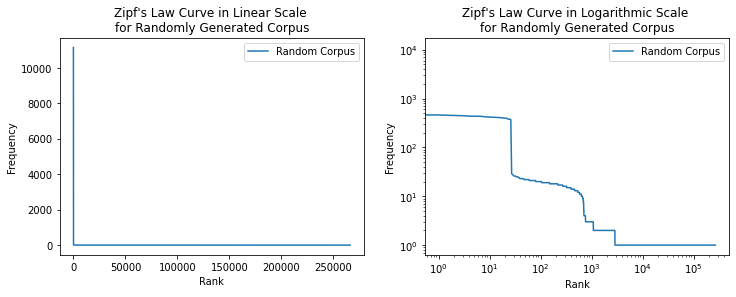

In [118]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(random_word_freqs, label = "Random Corpus")
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Law Curve in Linear Scale \nfor Randomly Generated Corpus")
plt.legend()

plt.subplot(122)
plt.loglog(random_word_freqs, label = "Random Corpus")
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Law Curve in Logarithmic Scale \nfor Randomly Generated Corpus")
plt.legend()
plt.show()

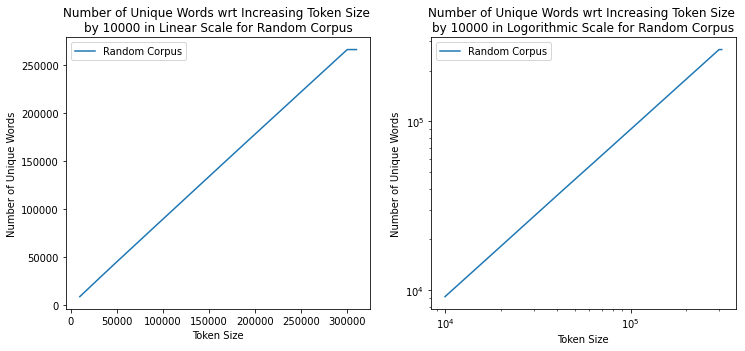

In [120]:
size = 10000

num_unique_words_random = count_word_types(randomly_generated_corpus, size = size)
range_random = np.arange(size, (len(num_unique_words_random)+1)*size, size)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(range_random, num_unique_words_random)
plt.xlabel("Token Size")
plt.ylabel("Number of Unique Words")
plt.legend(["Random Corpus"])
plt.title(f"Number of Unique Words wrt Increasing Token Size \nby {size} in Linear Scale for Random Corpus")

plt.subplot(122)
plt.loglog(range_random, num_unique_words_random)
plt.xlabel("Token Size")
plt.ylabel("Number of Unique Words")
plt.legend(["Random Corpus"])
plt.title(f"Number of Unique Words wrt Increasing Token Size \nby {size} in Logorithmic Scale for Random Corpus")
plt.show()

In [132]:
word_size = 10000
t1 = time.time()
random_corpus_short = []
for i in range(30):
    random_corpus_short.extend(random_generated_corpus(size_by_word=word_size, max_len = 3, alphabet = None))
    if i % 5 == 0:
        t2 = time.time()
        print(i , round(t2-t1, 2))
t3 = time.time()
print(f"To create {word_size*30} words took {round(t3-t1, 2)} secs")
print(len(random_corpus_short))

0 3.83
5 16.91
10 31.51
15 44.5
20 58.26
25 71.21
To create 300000 words took 81.6 secs
300032


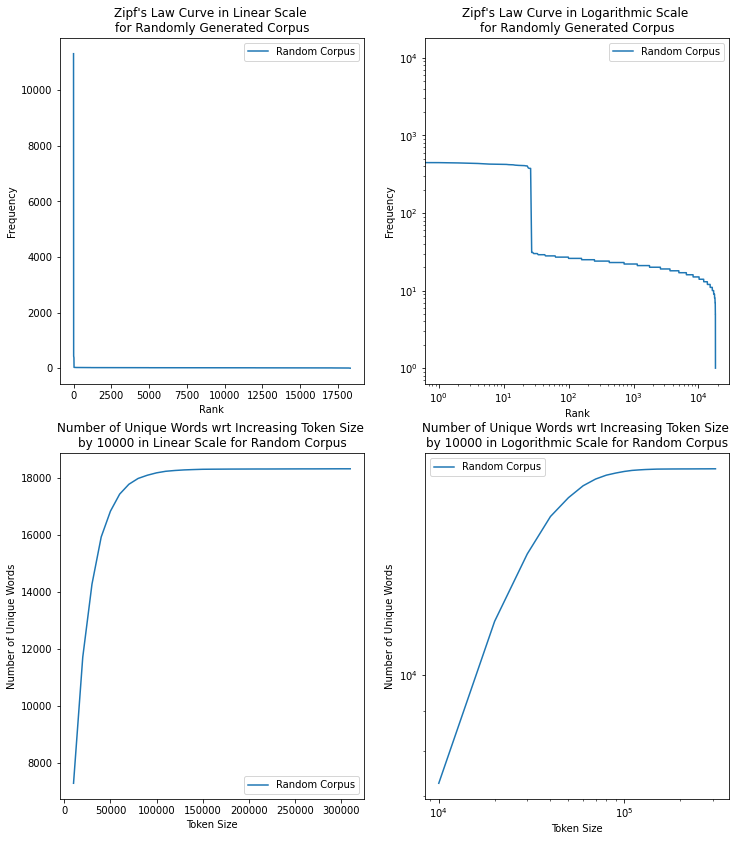

In [133]:
random_word_types, random_word_freqs = create_frequency_dict(random_corpus_short, diction = False)

plt.figure(figsize=(12,14))
plt.subplot(221)
plt.plot(random_word_freqs, label = "Random Corpus")
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Law Curve in Linear Scale \nfor Randomly Generated Corpus")
plt.legend()

plt.subplot(222)
plt.loglog(random_word_freqs, label = "Random Corpus")
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Law Curve in Logarithmic Scale \nfor Randomly Generated Corpus")
plt.legend()


size = 10000

num_unique_words_random = count_word_types(random_corpus_short, size = size)
range_random = np.arange(size, (len(num_unique_words_random)+1)*size, size)


plt.subplot(223)
plt.plot(range_random, num_unique_words_random)
plt.xlabel("Token Size")
plt.ylabel("Number of Unique Words")
plt.legend(["Random Corpus"])
plt.title(f"Number of Unique Words wrt Increasing Token Size \nby {size} in Linear Scale for Random Corpus")

plt.subplot(224)
plt.loglog(range_random, num_unique_words_random)
plt.xlabel("Token Size")
plt.ylabel("Number of Unique Words")
plt.legend(["Random Corpus"])
plt.title(f"Number of Unique Words wrt Increasing Token Size \nby {size} in Logorithmic Scale for Random Corpus")
plt.show()